<a href="https://colab.research.google.com/github/rusamentiaga/pytorch-test/blob/main/2_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import matplotlib.pyplot as plt
import torch
torch.version.__version__

'1.8.0+cu101'

In [93]:
torch.cuda.is_available()

True

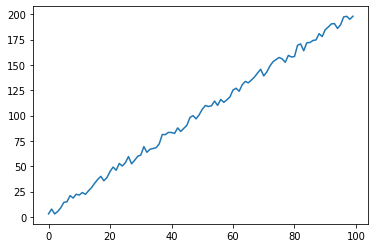

In [94]:
torch.manual_seed(0)

x = torch.tensor(range(100))
W = 2
B = 3
y = W*x + B
y = y + 10*(torch.rand(x.shape[0]) - 0.5)
plt.plot(x,y)

In [95]:
def model(x, w, b):
  return w * x + b

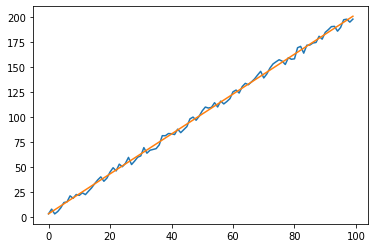

In [96]:
plt.plot(x,y)

yp = model(x, W, B)
plt.plot(x,yp)

In [97]:
def loss_fn(yp, y):
  squared_diffs = (yp - y)**2
  return squared_diffs.mean()

In [98]:
loss_fn(yp, y)

tensor(8.6010)

In [99]:
y3 = model(x, W, B + .3)
loss_fn(y3, y)

tensor(8.7605)

*   y = wx + b
*   dy/dw = x
*   dy/db = 1
*   dloss/dw = dloss/dy * dy/dw
*   dloss/db = dloss/dy * dy/db




In [100]:
def dy_dw(x, w, b):
  return x

def dy_db(x, w, b):
  return 1.0

def dloss_fn(yp, y):
  dsq_diffs = 2 * (yp - y) / yp.size(0)
  return dsq_diffs

def grad_fn(x, y, yp, w, b):
  dloss_dy = dloss_fn(yp, y)
  dloss_dw = dloss_dy * dy_dw(x, w, b)
  dloss_db = dloss_dy * dy_db(x, w, b)
  return (dloss_dw.sum(), dloss_db.sum())

In [101]:
def training_loop(n_epochs, learning_rate, wp, bp, x, y):

  loss_epochs = []
  for epoch in range(n_epochs):
      # Computes our model's predicted output
      yp = model(x, wp, bp)
      
      # How wrong is our model? That's the error! 
      loss = loss_fn(yp, y)
      loss_epochs.append(loss)

      (wp_grad, bp_grad) = grad_fn(x, y, yp, wp, bp)
    
      # Updates parameters using gradients and the learning rate
      wp = wp - learning_rate * wp_grad
      bp = bp - learning_rate * bp_grad

      if epoch+1 in (1, 2, 3, 4, 5, 10, 100, 500, 1000, 5000, 10000):
        print(f'Epoch {epoch+1}, Loss {loss}, wp_grad: {wp_grad}, bp_grad: {bp_grad}')
    
  return (wp, bp, loss_epochs)

In [102]:
(wp, bp, loss) = training_loop(n_epochs = 1000, 
              learning_rate = 1e-2,
              wp = 1,
              bp = 1,
              x = x,
              y = y)

Epoch 1, Loss 3491.89306640625, wp_grad: -6763.255859375, bp_grad: -102.76838684082031
Epoch 2, Loss 14572118.0, wp_grad: 437481.5, bp_grad: 6594.91015625
Epoch 3, Loss 60971732992.0, wp_grad: -28298460.0, bp_grad: -426643.625
Epoch 4, Loss 255114279387136.0, wp_grad: 1830483712.0, bp_grad: 27597362.0
Epoch 5, Loss 1.0674335821940654e+18, wp_grad: -118404694016.0, bp_grad: -1785133312.0
Epoch 10, Loss 1.3688997551443584e+36, wp_grad: 1.3408626104393427e+20, bp_grad: 2.0215571310266286e+18
Epoch 100, Loss nan, wp_grad: nan, bp_grad: nan
Epoch 500, Loss nan, wp_grad: nan, bp_grad: nan
Epoch 1000, Loss nan, wp_grad: nan, bp_grad: nan


In [103]:
(wp, bp, loss) = training_loop(n_epochs = 10000, 
              learning_rate = 1e-4,
              wp = 1,
              bp = 1,
              x = x,
              y = y)

Epoch 1, Loss 3491.89306640625, wp_grad: -6763.255859375, bp_grad: -102.76838684082031
Epoch 2, Loss 419.2891540527344, wp_grad: -2320.80859375, bp_grad: -35.79161071777344
Epoch 3, Loss 57.482444763183594, wp_grad: -796.37939453125, bp_grad: -12.808448791503906
Epoch 4, Loss 14.878763198852539, wp_grad: -273.2704162597656, bp_grad: -4.921734809875488
Epoch 5, Loss 9.862009048461914, wp_grad: -93.76502227783203, bp_grad: -2.215372085571289
Epoch 10, Loss 9.192130088806152, wp_grad: -0.43365478515625, bp_grad: -0.8080571889877319
Epoch 100, Loss 9.186361312866211, wp_grad: 0.01206207275390625, bp_grad: -0.7976835370063782
Epoch 500, Loss 9.16141414642334, wp_grad: 0.010945320129394531, bp_grad: -0.781667947769165
Epoch 1000, Loss 9.131614685058594, wp_grad: 0.01105499267578125, bp_grad: -0.7620790004730225
Epoch 5000, Loss 8.940637588500977, wp_grad: 0.009258270263671875, bp_grad: -0.6220826506614685
Epoch 10000, Loss 8.788850784301758, wp_grad: 0.008399009704589844, bp_grad: -0.4826639

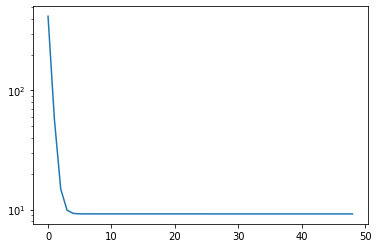

In [104]:
plt.semilogy(loss[1:50])

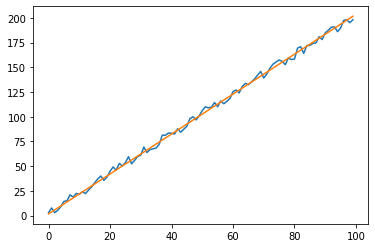

In [105]:
plt.plot(x,y)

yp = model(x, wp, bp)
plt.plot(x, yp)

In [106]:
(wp, bp, loss) = training_loop(n_epochs = 1000, 
              learning_rate = 1e-2,
              wp = 1,
              bp = 1,
              x = x*0.1,
              y = y)

Epoch 1, Loss 12238.45703125, wp_grad: -1267.3555908203125, bp_grad: -191.86839294433594
Epoch 2, Loss 1326.7628173828125, wp_grad: -416.088134765625, bp_grad: -62.56282043457031
Epoch 3, Loss 150.96116638183594, wp_grad: -136.6494140625, bp_grad: -20.11884117126465
Epoch 4, Loss 24.25811195373535, wp_grad: -44.9200439453125, bp_grad: -6.188183307647705
Epoch 5, Loss 10.60157585144043, wp_grad: -14.808431625366211, bp_grad: -1.6173384189605713
Epoch 10, Loss 8.933691024780273, wp_grad: -0.14766216278076172, bp_grad: 0.5941300392150879
Epoch 100, Loss 8.712175369262695, wp_grad: -0.05856895446777344, bp_grad: 0.38515758514404297
Epoch 500, Loss 8.56208610534668, wp_grad: -0.00793468952178955, bp_grad: 0.05267852544784546
Epoch 1000, Loss 8.559248924255371, wp_grad: -0.0006420016288757324, bp_grad: 0.004382655024528503


In [107]:
from sklearn.linear_model import LinearRegression
import numpy
linr = LinearRegression()
xnp = x.numpy().reshape((-1, 1))
ynp = y.numpy()
linr.fit(xnp, ynp)
print(linr.intercept_, linr.coef_[0])

yp = model(x, linr.coef_[0], linr.intercept_)
     
# How wrong is our model? That's the error! 
loss = loss_fn(yp, y)

print(loss)

2.5954728104808567 2.005832774851582
tensor(8.5592)


In [108]:
def training_loop_grad(n_epochs, learning_rate, wp, bp, x, y):

  wp = torch.tensor(wp, requires_grad=True, dtype=torch.float)
  bp = torch.tensor(bp, requires_grad=True, dtype=torch.float)

  for epoch in range(n_epochs):
      # Computes our model's predicted output
      yp = model(x, wp, bp)
      
      # How wrong is our model? That's the error! 
      loss = loss_fn(yp, y)
      loss.backward()

      # no_grad sirve para que pytorch no tenga en cuenta esta operación en el cáluclo del gradiente
      with torch.no_grad():
        wp -= learning_rate * wp.grad
        bp -= learning_rate * bp.grad

      if epoch+1 in (1, 2, 3, 4, 5, 10, 100, 500, 1000, 5000, 10000):
        print(f'Epoch {epoch+1}, Loss {loss}, wp_grad: {wp.grad}, bp_grad: {bp.grad}')

      wp.grad.zero_()
      bp.grad.zero_()
    
  return (wp, bp)


(wp, bp) = training_loop_grad(n_epochs = 1000, 
              learning_rate = 1e-4,
              wp = 1.0,
              bp = 1.0,
              x = x,
              y = y)

Epoch 1, Loss 3491.89306640625, wp_grad: -6763.25537109375, bp_grad: -102.76837921142578
Epoch 2, Loss 419.2891540527344, wp_grad: -2320.808349609375, bp_grad: -35.791603088378906
Epoch 3, Loss 57.482444763183594, wp_grad: -796.3792724609375, bp_grad: -12.808448791503906
Epoch 4, Loss 14.878763198852539, wp_grad: -273.2704162597656, bp_grad: -4.921734809875488
Epoch 5, Loss 9.862009048461914, wp_grad: -93.76502227783203, bp_grad: -2.215372085571289
Epoch 10, Loss 9.192130088806152, wp_grad: -0.43365478515625, bp_grad: -0.8080571889877319
Epoch 100, Loss 9.186361312866211, wp_grad: 0.012063980102539062, bp_grad: -0.7976834774017334
Epoch 500, Loss 9.16141414642334, wp_grad: 0.010945320129394531, bp_grad: -0.7816678881645203
Epoch 1000, Loss 9.131614685058594, wp_grad: 0.011056900024414062, bp_grad: -0.7620788812637329


In [109]:
!pip install torchviz

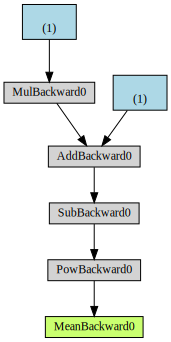

In [110]:
import torchviz

w = torch.randn(1, requires_grad=True, dtype=torch.float)
b = torch.randn(1, requires_grad=True, dtype=torch.float)

yp = x * w + b
error = yp - y
loss = (error ** 2).mean()

torchviz.make_dot(loss)

In [111]:
def training_loop_optim(n_epochs, optimizer, wp, bp, x, y):

  for epoch in range(n_epochs):
      # Computes our model's predicted output
      yp = model(x, wp, bp)
      
      # How wrong is our model? That's the error! 
      loss = loss_fn(yp, y)
      loss.backward()

      optimizer.step()

      if epoch+1 in (1, 2, 3, 4, 5, 10, 100, 500, 1000, 5000, 10000):
        print(f'Epoch {epoch+1}, Loss {loss}, wp_grad: {wp.grad}, bp_grad: {bp.grad}')

      optimizer.zero_grad()
    
  return (wp, bp)

learning_rate = 1e-4

wp = torch.tensor(1, requires_grad=True, dtype=torch.float)
bp = torch.tensor(1, requires_grad=True, dtype=torch.float)

optimizer = torch.optim.SGD([wp, bp], lr=learning_rate)

(wp, bp) = training_loop_optim(n_epochs = 1000, 
              optimizer = optimizer,
              wp = wp,
              bp = bp,
              x = x,
              y = y)

Epoch 1, Loss 3491.89306640625, wp_grad: -6763.25537109375, bp_grad: -102.76837921142578
Epoch 2, Loss 419.2891540527344, wp_grad: -2320.808349609375, bp_grad: -35.791603088378906
Epoch 3, Loss 57.482444763183594, wp_grad: -796.3792724609375, bp_grad: -12.808448791503906
Epoch 4, Loss 14.878763198852539, wp_grad: -273.2704162597656, bp_grad: -4.921734809875488
Epoch 5, Loss 9.862009048461914, wp_grad: -93.76502227783203, bp_grad: -2.215372085571289
Epoch 10, Loss 9.192130088806152, wp_grad: -0.43365478515625, bp_grad: -0.8080571889877319
Epoch 100, Loss 9.186361312866211, wp_grad: 0.012063980102539062, bp_grad: -0.7976834774017334
Epoch 500, Loss 9.16141414642334, wp_grad: 0.010945320129394531, bp_grad: -0.7816678881645203
Epoch 1000, Loss 9.131614685058594, wp_grad: 0.011056900024414062, bp_grad: -0.7620788812637329


In [112]:
learning_rate = 1e-1

wp = torch.tensor(1, requires_grad=True, dtype=torch.float)
bp = torch.tensor(1, requires_grad=True, dtype=torch.float)

optimizer = torch.optim.Adam([wp, bp], lr=learning_rate)

(wp, bp) = training_loop_optim(n_epochs = 1000, 
              optimizer = optimizer,
              wp = wp,
              bp = bp,
              x = x,
              y = y)

Epoch 1, Loss 3491.89306640625, wp_grad: -6763.25537109375, bp_grad: -102.76837921142578
Epoch 2, Loss 2839.1259765625, wp_grad: -6096.6552734375, bp_grad: -92.66838836669922
Epoch 3, Loss 2256.255859375, wp_grad: -5432.74755859375, bp_grad: -82.60918426513672
Epoch 4, Loss 1744.1195068359375, wp_grad: -4773.8076171875, bp_grad: -72.625244140625
Epoch 5, Loss 1302.919921875, wp_grad: -4122.5400390625, bp_grad: -62.757545471191406
Epoch 10, Loss 102.81088256835938, wp_grad: -1111.7730712890625, bp_grad: -17.139726638793945
Epoch 100, Loss 8.628947257995605, wp_grad: -8.459798812866211, bp_grad: -0.3829543888568878
Epoch 500, Loss 8.561346054077148, wp_grad: 0.04411125183105469, bp_grad: -0.04572838544845581
Epoch 1000, Loss 8.55922794342041, wp_grad: 0.0007381439208984375, bp_grad: -0.0008340030908584595


Text(0.5, 1.0, 'Model: y = x*2.0058577060699463 + 2.593824625015259')

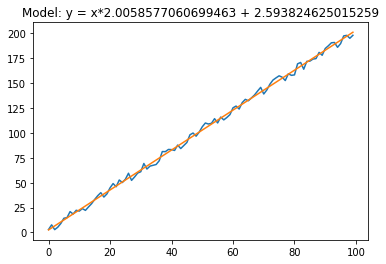

In [113]:
plt.plot(x,y)

yp = model(x, wp, bp)
plt.plot(x, yp.detach().numpy())
plt.title(f'Model: y = x*{wp} + {bp}')